# Problem

**Objective**: Determine how interventions impact sales performance and satisfaction.

Possible expansion: Compare results of complete data (no missing entries), modified data (imputation of missing entries), and sparse data (dropped missing entries).

# Imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# data without missing entries
file_path = "Sales_without_NaNs_v1.3.csv"
df = pd.read_csv(file_path)
df.head()

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,74.093658,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,Control,High Value,229.685623,270.167701,83.974852,87.738591,Yes


# EDA

## Data Cleaning

In [61]:
print(f"Number of Rows/Entries: {df.shape[0]}")
print(f"Number of Columns/Variables: {df.shape[1]}")
print(df.columns)

Number of Rows/Entries: 10000
Number of Columns/Variables: 7
Index(['Group', 'Customer_Segment', 'Sales_Before', 'Sales_After',
       'Customer_Satisfaction_Before', 'Customer_Satisfaction_After',
       'Purchase_Made'],
      dtype='object')


In [14]:
df.isna().sum()

Group                           0
Customer_Segment                0
Sales_Before                    0
Sales_After                     0
Customer_Satisfaction_Before    0
Customer_Satisfaction_After     0
Purchase_Made                   0
dtype: int64

In [15]:
display(df.describe())

,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,203.846220,280.378330,70.249026,73.921449
std,55.431215,85.463933,16.927639,18.185050
min,24.852966,32.414352,22.202441,18.224938
25%,166.610755,221.438134,56.348229,59.866027
50%,203.347924,273.599150,69.644307,73.708858
75%,239.220116,332.376500,83.318174,90.403099
max,545.422547,818.219997,100.000000,100.000000


## Visualization

Satisfaction vs. Sales 
- the cluster slightly shift to the right, which implies increase in sales

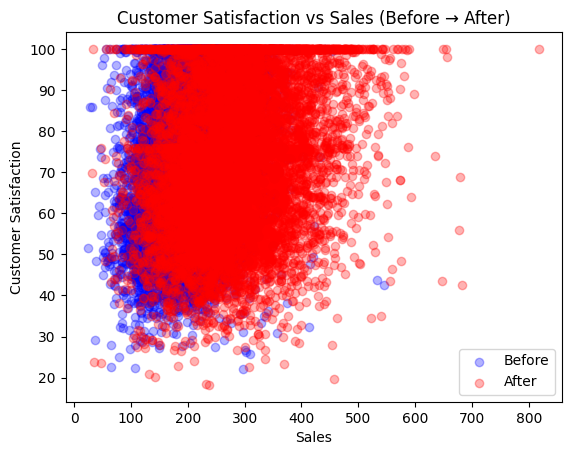

In [16]:
# Scatter "before"
plt.scatter(df["Sales_Before"], df["Customer_Satisfaction_Before"], 
            color="blue", label="Before", alpha=0.3)

# Scatter "after"
plt.scatter(df["Sales_After"], df["Customer_Satisfaction_After"], 
            color="red", label="After", alpha=0.3)

plt.xlabel("Sales")
plt.ylabel("Customer Satisfaction")
plt.title("Customer Satisfaction vs Sales (Before → After)")
plt.legend()
plt.show()

Sales vs. Purchase made
- not very sure how can purchase made = No but still have Sales After

In [37]:
df[['Purchase_Made', 'Sales_Before', 'Sales_After']]

,Purchase_Made,Sales_Before,Sales_After
0,No,240.548359,300.007568
1,Yes,246.862114,381.337555
2,No,156.978084,179.330464
3,Yes,192.126708,229.278031
4,Yes,229.685623,270.167701
...,...,...,...
9995,No,259.695935,415.181694
9996,Yes,186.488285,216.225457
9997,No,208.107142,322.893351
9998,No,267.772651,431.974901


values vs sales

- the shift of medium sales are similar across all guests
- 

<Figure size 600x400 with 0 Axes>

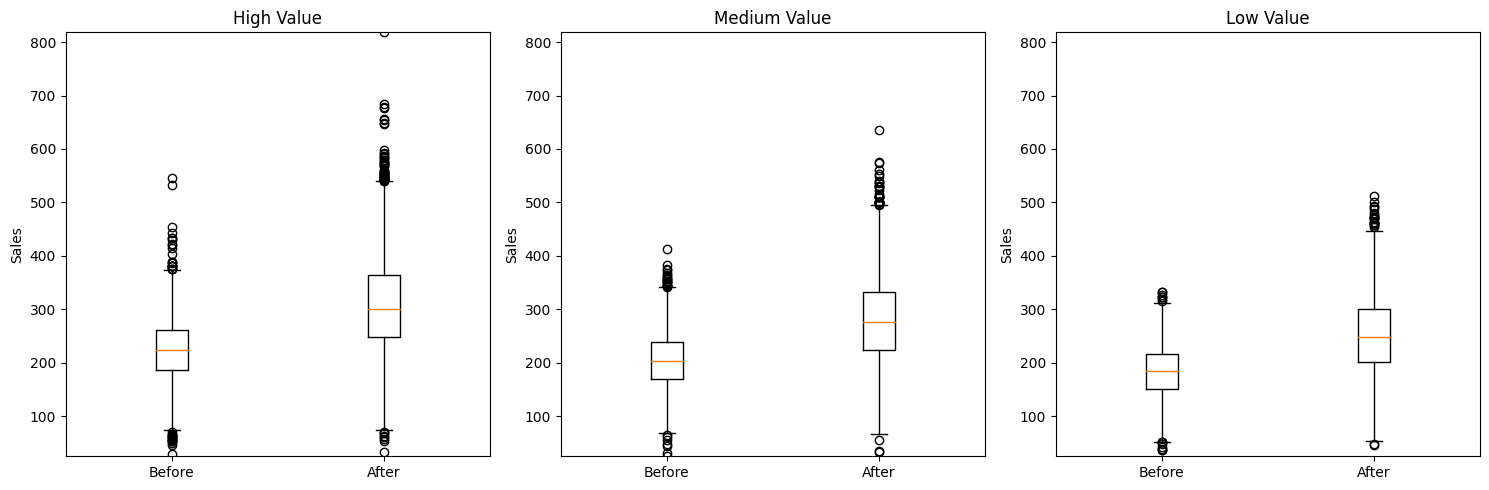

In [33]:
high_values = df[df['Customer_Segment'] == 'High Value']
high_values_before = high_values['Sales_Before'] # [[ ]] gives data frame, [] gives series that can be used in box
high_values_after = high_values['Sales_After']

medium_values = df[df['Customer_Segment'] == 'Medium Value']
medium_values_before = medium_values['Sales_Before']
medium_values_after = medium_values['Sales_After']

low_values = df[df['Customer_Segment'] == 'Low Value']
low_values_before = low_values['Sales_Before']
low_values_after = low_values['Sales_After']

plt.figure(figsize=(6,4))
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].boxplot([high_values_before, high_values_after], labels=["Before", "After"])
axs[0].set_title('High Value')
axs[0].set_ylabel('Sales')

axs[1].boxplot([medium_values_before, medium_values_after], labels=["Before", "After"])
axs[1].set_title('Medium Value')
axs[1].set_ylabel('Sales')

axs[2].boxplot([low_values_before, low_values_after], labels=["Before", "After"])
axs[2].set_title('Low Value')
axs[2].set_ylabel('Sales')

# Find global min/max across all sales values
all_sales = pd.concat([
    high_values_before, high_values_after,
    medium_values_before, medium_values_after,
    low_values_before, low_values_after
])
ymin, ymax = all_sales.min(), all_sales.max()

# Apply the same y-axis limits to all subplots
for ax in axs:
    ax.set_ylim(ymin, ymax)

plt.tight_layout()
plt.show()


Group vs. Sales
- no significant different for both groups before tratment
- medium increased after for treatment group
- more higher percentile sales for treatment group after intervention

<Figure size 600x400 with 0 Axes>

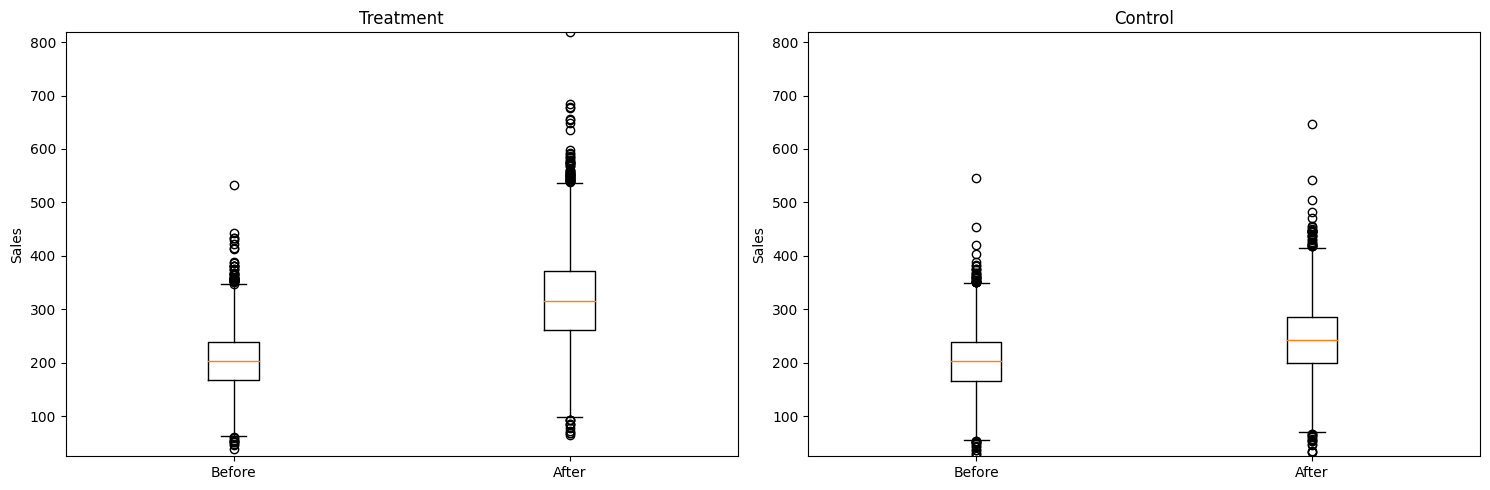

In [38]:
treatment = df[df['Group'] == 'Treatment']
treatment_before = treatment['Sales_Before'] # [[ ]] gives data frame, [] gives series that can be used in box
treatment_after = treatment['Sales_After']

control = df[df['Group'] == 'Control']
control_before = control['Sales_Before']
control_after = control['Sales_After']

plt.figure(figsize=(6,4))
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].boxplot([treatment_before, treatment_after], labels=["Before", "After"])
axs[0].set_title('Treatment')
axs[0].set_ylabel('Sales')

axs[1].boxplot([control_before, control_after], labels=["Before", "After"])
axs[1].set_title('Control')
axs[1].set_ylabel('Sales')

# Find global min/max across all sales values
all_sales = pd.concat([
    treatment_before, treatment_after,
    control_before, control_after
])
ymin, ymax = all_sales.min(), all_sales.max()

# Apply the same y-axis limits to all subplots
for ax in axs:
    ax.set_ylim(ymin, ymax)

plt.tight_layout()
plt.show()


### What kind of guest get impacted the most?

# Hypothesis Test
### Goal : Is intervention increasing Sales? Is intervention inceasing Customer Satisfcation? 

### Sales
- 2 sample Z-test : sample > 30
- H0 : Intervention has no impact on Sales for treatment group
- H1 : Intervention impacted Sales for treatment group
- Hypothesis : mu_treatment - mu_control = 0

In [ ]:
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest

#treatment
a = df[df['Group'] == 'Treatment']['Sales_After']
#control 
b = df[df['Group'] == 'Control']['Sales_After']

z_stat, p_value = ztest(a, b, value=0)

print("Z-statistic:", z_stat)
print("P-value:", p_value)
print(np.mean(a), np.mean(b))

Z-statistic: 49.070074902719654
P-value: 0.0
318.12628180144907 242.8261579296649


A two-sample z-test was conducted to compare post-intervention sales between the Treatment and Control groups. Results indicate a statistically significant difference in average sales (Z = 49.07, p < 0.001). The Treatment group’s mean sales (M = 318.13) were substantially higher than the Control group’s (M = 242.83), suggesting that the intervention had a strong positive effect.

### Satisfaction
- 2 sample Z-test : sample > 30
- H0 : Intervention has no impact on Satisfaction for treatment group
- H1 : Intervention impacted Satisfaction for treatment group
- Hypothesis : mu_treatment - mu_control = 0

# Binary Prediction
### Goal : Is intervention help with purchase made?

### Logistic Regression
I also tried other similar models such as XGBoost, random forest. However, the accuracy is all around 50%.

Train Accuracy: 0.503375
Test Accuracy: 0.5085


<Axes: >

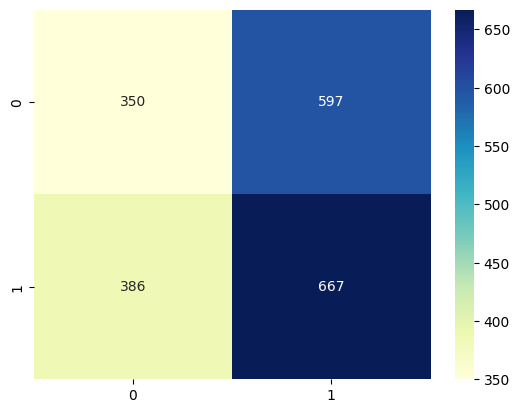

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

X = df[['Customer_Segment', 'Group', 'Sales_Before', 'Customer_Satisfaction_Before']] # before data only
y = df['Purchase_Made'].map({'Yes':1, 'No':0})  

categorical = ['Customer_Segment', 'Group']
numeric = ['Sales_Before', 'Customer_Satisfaction_Before']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
        ('num', 'passthrough', numeric) # standardize 
    ]
)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')


## K Means Clustering
### Goal : What kind of guests are getting impacted the most?

Train cluster distribution: 0    2825
1    2712
2    2463
Name: count, dtype: int64
Test cluster distribution: 0    702
1    690
2    608
Name: count, dtype: int64


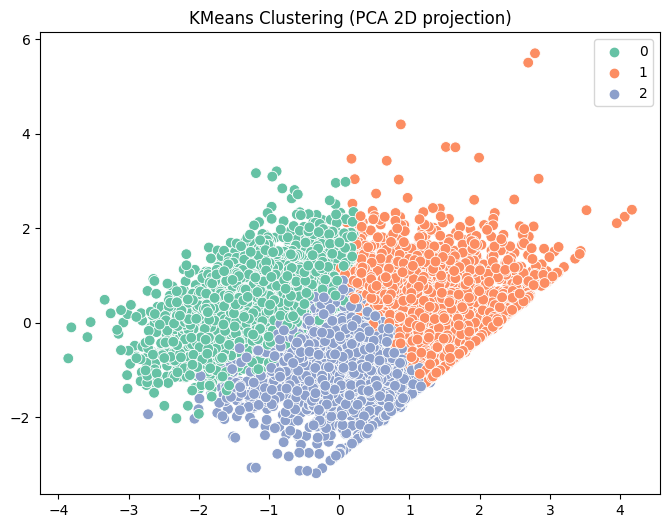

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

X = df[['Customer_Segment', 'Group', 'Sales_Before', 'Customer_Satisfaction_Before']]

categorical = ['Customer_Segment', 'Group']
numeric = ['Sales_Before', 'Customer_Satisfaction_Before']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop="first"), categorical),
        ('num', StandardScaler(), numeric)
    ]
)

kmeans = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('cluster', KMeans(n_clusters=3, random_state=42))
])

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
kmeans.fit(X_train)

train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

print("Train cluster distribution:", pd.Series(train_clusters).value_counts())
print("Test cluster distribution:", pd.Series(test_clusters).value_counts())

# ====== Plot (only works if we reduce to 2D) ======
# Use PCA for visualization
from sklearn.decomposition import PCA

X_processed = preprocessor.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

clusters = kmeans.named_steps['cluster'].fit_predict(X_processed)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set2", s=60)
plt.title("KMeans Clustering (PCA 2D projection)")
plt.show()
